In [1]:
import pandas as pd
from utilities.utils import preprocess_heading_text
from utilities.utils import to_wcdf
from utilities.utils import visualize_counts

In [2]:
path = "../data/merged_headings_df.csv"
merged_headings_df = pd.read_csv(path, index_col = 0)

print(f"NAs Before: {merged_headings_df['Heading Text'].isna().sum()}")
print(f"Shape Before: {merged_headings_df.shape}")

def drop_duplicates_and_na(data):
    # dropping duplicates
    data = data.drop_duplicates()
    # dropping nan
    data = data.dropna()
    
    return data

merged_headings_df = drop_duplicates_and_na(merged_headings_df)

print(f"NAs After: {merged_headings_df['Heading Text'].isna().sum()}")
print(f"Shape After: {merged_headings_df.shape}")

merged_headings_df.head()

NAs Before: 845
Shape Before: (7218, 5)
NAs After: 0
Shape After: (5499, 5)


,ID,Heading Text,Heading Title,Frequency,Person/Job/Org/None
0,0,This is a unique opportunity to collaborate wi...,position summary,56,Job
1,43,We are looking for a full time Data Scientist ...,position summary,56,Job
2,157,The Senior Data Analyst is responsible for ana...,position summary,56,Job
3,176,In this role you'll be working on a team desig...,position summary,56,Job
4,183,The Senior Data Analyst is responsible for ana...,position summary,56,Job


Using Default Stopwords


/Users/mtaruno/opt/anaconda3/envs/cannon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


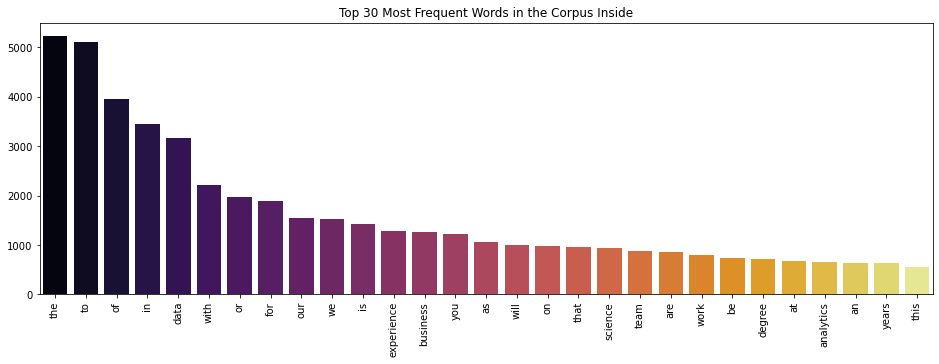

In [3]:
wcdf = to_wcdf(merged_headings_df['Heading Text'])

visualize_counts(wcdf)

In [4]:
# Preprocessing Heading Text
merged_headings_df['Heading Text'] = merged_headings_df['Heading Text'].apply(preprocess_heading_text)

In [5]:
merged_headings_df['Heading Text']

0       unique opportunity collaborate diverse team te...
1       looking full time data scientist work one area...
2       senior data analyst responsible analyzing medi...
3       role working team designing building testing n...
4       senior data analyst responsible analyzing medi...
                              ...                        
7158                            employment type full time
7159          organization wm national sales marketing hr
7187    bachelor degree business admin management info...
7188    must masters bachelors degree computer science...
7196    must able perform pressure fast paced environment
Name: Heading Text, Length: 5499, dtype: object

Using Default Stopwords


/Users/mtaruno/opt/anaconda3/envs/cannon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


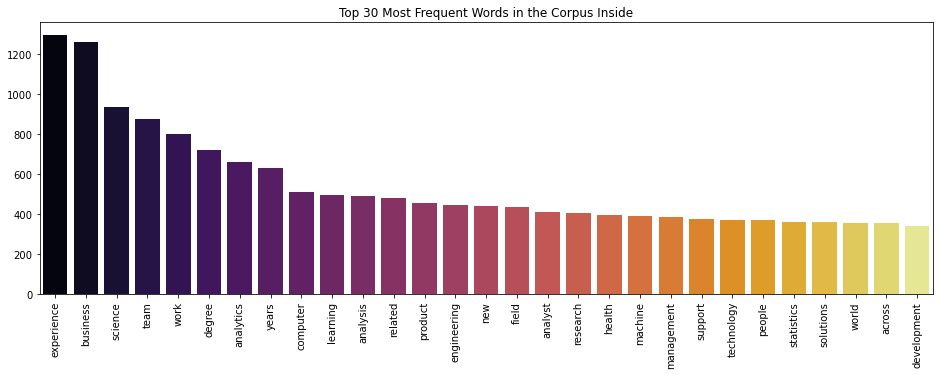

In [6]:
wcdf2 = to_wcdf(merged_headings_df['Heading Text'])

visualize_counts(wcdf2)

In [8]:
# Most common 2-grams
wcdf_2grams = to_wcdf(merged_headings_df['Heading Text'], ngram_range = (1,2))

Using Default Stopwords


/Users/mtaruno/opt/anaconda3/envs/cannon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


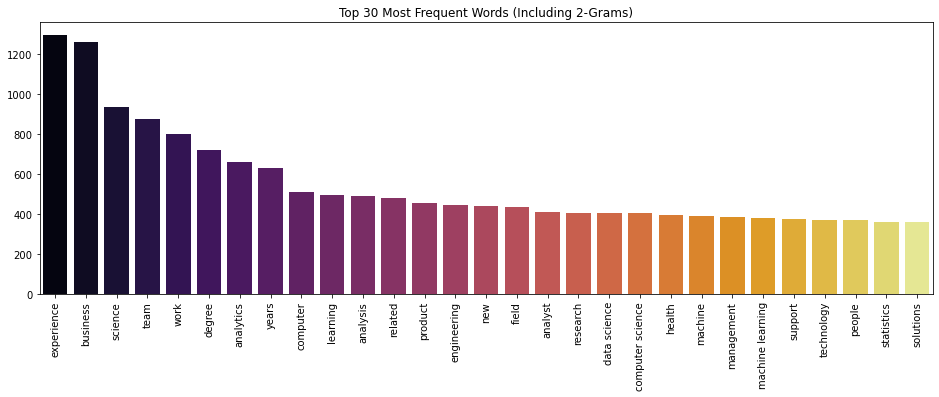

In [9]:
visualize_counts(wcdf_2grams, title = "Top 30 Most Frequent Words (Including 2-Grams)")

In [10]:
merged_headings_df

,ID,Heading Text,Heading Title,Frequency,Person/Job/Org/None
0,0,unique opportunity collaborate diverse team te...,position summary,56,Job
1,43,looking full time data scientist work one area...,position summary,56,Job
2,157,senior data analyst responsible analyzing medi...,position summary,56,Job
3,176,role working team designing building testing n...,position summary,56,Job
4,183,senior data analyst responsible analyzing medi...,position summary,56,Job
...,...,...,...,...,...
7158,1649,employment type full time,job wealth management,2,Job
7159,1691,organization wm national sales marketing hr,job wealth management,2,Job
7187,1671,bachelor degree business admin management info...,education and experience required,2,Person
7188,1690,must masters bachelors degree computer science...,education and experience required,2,Person


In [16]:
merged_headings_df['Person/Job/Org/None'].value_counts()

Job       2191
Person    1951
Org        753
None       556
?           48
Name: Person/Job/Org/None, dtype: int64

In [18]:
# Dropping the ? from the target

merged_headings_df = merged_headings_df[merged_headings_df['Person/Job/Org/None'] != '?']

In [19]:
merged_headings_df['Person/Job/Org/None'].value_counts()

Job       2191
Person    1951
Org        753
None       556
Name: Person/Job/Org/None, dtype: int64

In [22]:
# Saving preprocessed heading text to disk
DATADIR = '../data/'

merged_headings_df.to_csv(DATADIR + "preprocessed_merged_headings_df.csv")